# Unit 5 - Financial Planning

In [84]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [85]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [86]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [87]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [88]:
# Fetch current BTC price
import json 
btc_value = requests.get(btc_url)
btc_content = btc_value.content
btc_value = btc_value.json()
# print(json.dumps(btc_value, indent=4))
BTC_price = btc_value["data"]["1"]["quotes"]["CAD"]["price"]


# # Fetch current ETH price
eth_value = requests.get(eth_url)
eth_content = eth_value.content
eth_value = eth_value.json()
ETH_price = eth_value["data"]["1027"]["quotes"]["CAD"]["price"]

# # Compute current value of my crpto
my_btc_value = my_btc * BTC_price
my_eth_value = my_eth * ETH_price

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56060.72
The current value of your 5.3 ETH is $16190.33


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [89]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [95]:
# Set Alpaca API key and secret
Alpaca_api_key = os.getenv("Alpaca_api_key")
Alpaca_secret_key =  os.getenv("Alpaca_secret_key")


# Create the Alpaca API object
Alpaca = tradeapi.REST(Alpaca_api_key, Alpaca_secret_key, api_version = "v2")

In [ ]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-28").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = Alpaca.get_barset(tickers, timeframe, start = today, end = today, limit = 1000).df

df_portfolio = df_portfolio.sort_values("time", ascending = False)

# # Preview DataFrame
df_portfolio.index = df_portfolio.index.date
df_portfolio

AGG                                              SPY          \
                open      high       low    close      volume    open    high   
2022-01-27  111.6200  111.8800  111.6200  111.720   5836124.0  438.26  441.58   
2022-01-26  112.0600  112.1300  111.3600  111.360  10170465.0  440.72  444.04   
2022-01-25  112.1800  112.3000  111.9600  112.000   9392367.0  433.06  439.72   
2022-01-24  112.3814  112.4200  112.1000  112.120  10666672.0  432.03  440.38   
2022-01-21  112.1900  112.3500  112.1100  112.240   7792653.0  445.56  448.06   
...              ...       ...       ...      ...         ...     ...     ...   
2018-02-13  106.7900  106.9100  106.7000  106.830   3689890.0  263.94  266.62   
2018-02-12  106.7400  106.9450  106.6632  106.770   5075086.0  263.87  267.01   
2018-02-09  106.7800  107.0700  106.7000  106.760   5603974.0  260.80  263.61   
2018-02-08  106.8400  107.1400  106.7700  106.920   4351275.0  267.97  268.17   
2018-02-07  107.4300  107.4369  107.0000  107.085   3440626.0     NaN     NaN   

                                         
               low   close       volume  
2022-01-27  429.45  431.27  136251597.0  
2022-01-26  428.86  433.45  174214548.0  
2022-01-25  364.68  434.51  148023735.0  
2022-01-24  420.76  439.88  233026938.0  
2022-01-21  437.97  438.11  174541929.0  
...            ...     ...          ...  
2018-02-13  263.31  266.01   56891150.0  
2018-02-12  261.88  265.26   99933794.0  
2018-02-09  252.92  261.67  207357854.0  
2018-02-08  257.59  257.72  156654099.0  
2018-02-07     NaN     NaN          NaN  

[1001 rows x 10 columns]

In [133]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]


# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.72
Current SPY closing price: $431.27


In [134]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21563.50
The current value of your 200 AGG shares is $22344.00


### Savings Health Analysis

In [153]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
data = {"Amount" : [crypto, shares]}
df_savings = pd.DataFrame(data, index = ["Crypto", "Shares"]).round(2)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,72251.06
Shares,43907.50


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

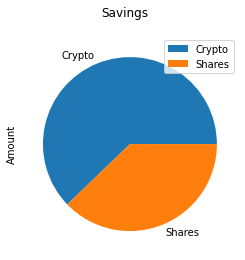

In [162]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots = True, title = "Savings")

In [184]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares


# Validate saving health
    
if total_savings > emergency_fund:
    print(f'congratulations! you have enough money in this fund.')
elif total_savings == emergency_fund:
    print(f"congratulations! you have reached your financial goal.")
else:
    print(f"you still need {emergency_fund - total_savings} to reach your goal.")

congratulations! you have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [204]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-28', tz='America/New_York').isoformat()

In [209]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = Alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date, limit = 1000).df

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data

AGG                                          SPY          \
                open     high       low   close    volume    open    high   
2018-02-08  106.8400  107.140  106.7700  106.92   4351275  267.97  268.17   
2018-02-09  106.7800  107.070  106.7000  106.76   5603974  260.80  263.61   
2018-02-12  106.7400  106.945  106.6632  106.77   5075086  263.87  267.01   
2018-02-13  106.7900  106.910  106.7000  106.83   3689890  263.94  266.62   
2018-02-14  106.5700  106.660  106.4039  106.46   3695997  264.47  270.00   
...              ...      ...       ...     ...       ...     ...     ...   
2022-01-21  112.1900  112.350  112.1100  112.24   7789076  445.56  448.06   
2022-01-24  112.3814  112.420  112.1000  112.12  10666672  432.03  440.38   
2022-01-25  112.1800  112.300  111.9600  112.00   9392367  433.06  439.72   
2022-01-26  112.0600  112.130  111.3600  111.36  10170465  440.72  444.04   
2022-01-27  111.6200  111.880  111.6200  111.72   5836124  438.26  441.58   

                                       
               low   close     volume  
2018-02-08  257.59  257.72  156654099  
2018-02-09  252.92  261.67  207357854  
2018-02-12  261.88  265.26   99933794  
2018-02-13  263.31  266.01   56891150  
2018-02-14  263.97  269.71   86705860  
...            ...     ...        ...  
2022-01-21  437.97  438.11  174541931  
2022-01-24  420.76  439.88  233026938  
2022-01-25  364.68  434.51  148023735  
2022-01-26  428.86  433.45  174214548  
2022-01-27  429.45  431.27  136251597  

[1000 rows x 10 columns]

In [219]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC30 = MCSimulation( df_stock_data, weights = [.60, .40], num_simulation = 500, num_trading_days = 252 * 30)

In [218]:
# Printing the simulation input data
MC30.portfolio_data.head()

AGG                                                      SPY  \
              open     high       low   close   volume daily_return    open   
2018-02-08  106.84  107.140  106.7700  106.92  4351275          NaN  267.97   
2018-02-09  106.78  107.070  106.7000  106.76  5603974    -0.001496  260.80   
2018-02-12  106.74  106.945  106.6632  106.77  5075086     0.000094  263.87   
2018-02-13  106.79  106.910  106.7000  106.83  3689890     0.000562  263.94   
2018-02-14  106.57  106.660  106.4039  106.46  3695997    -0.003463  264.47   

                                                            
              high     low   close     volume daily_return  
2018-02-08  268.17  257.59  257.72  156654099          NaN  
2018-02-09  263.61  252.92  261.67  207357854     0.015327  
2018-02-12  267.01  261.88  265.26   99933794     0.013720  
2018-02-13  266.62  263.31  266.01   56891150     0.002827  
2018-02-14  270.00  263.97  269.71   86705860     0.013909

In [220]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jacks\Desktop\Fintech\usyd-syd-fin-pt-12-2021-u-c\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986293,0.994701,1.017237,1.002538,0.989426,0.998295,1.009243,0.998999,1.002348,1.010705,...,1.001762,0.993140,1.013818,0.995907,0.997144,0.994874,1.005197,1.006786,1.005176,0.989348
2,0.984983,0.995509,1.020471,1.001111,0.997932,1.004030,1.011439,1.012002,0.998951,1.020685,...,1.000354,0.989675,1.020517,1.005934,0.995119,1.000279,1.006074,1.003822,1.007247,0.993990
3,0.988787,0.996807,1.029715,1.004019,1.002790,1.011293,1.006559,1.008657,1.004849,1.013170,...,1.000907,1.004361,1.011104,1.002778,1.007647,1.004292,1.005704,1.011083,1.007242,0.990165
4,0.988117,0.990101,1.029425,1.006544,1.002575,1.015109,1.013566,1.005106,1.010523,1.006277,...,0.995691,1.005708,1.006168,0.998757,1.012860,0.993730,1.000693,1.022719,1.008517,0.989295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.999622,3.891822,5.645192,9.043477,8.653406,8.434894,20.292911,3.084219,3.473484,8.124145,...,7.247514,4.635701,9.428958,6.986140,4.906880,9.691635,2.657853,9.152881,3.635319,3.664816
7557,5.011004,3.922483,5.667565,9.095012,8.671520,8.415821,20.263425,3.100888,3.483012,8.153031,...,7.313653,4.634230,9.513619,6.961335,4.868518,9.734809,2.676462,9.138789,3.613145,3.676593
7558,5.011565,3.909822,5.729762,9.067579,8.622260,8.456650,20.323968,3.079566,3.447611,8.138849,...,7.315148,4.645154,9.481929,6.993453,4.859621,9.741347,2.661809,9.090052,3.611379,3.688402
7559,5.020292,3.909633,5.776984,9.107902,8.645890,8.502991,20.419819,3.063082,3.437165,8.053144,...,7.313877,4.590084,9.542270,7.008011,4.848731,9.748874,2.638783,9.161017,3.639012,3.701045


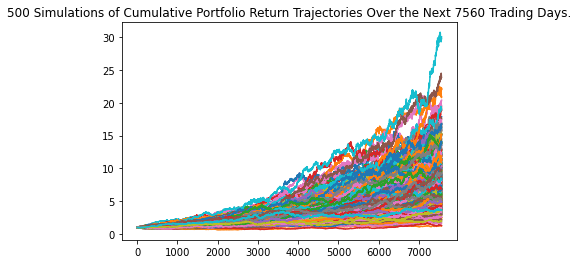

In [222]:
# Plot simulation outcomes
line_plot = MC30.plot_simulation()

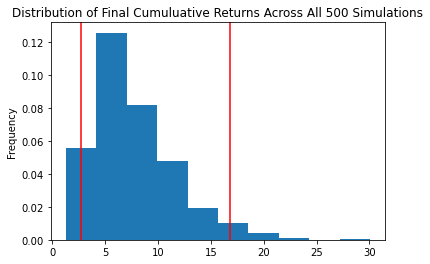

In [224]:
# Plot probability distribution and confidence intervals
dist_plot = MC30.plot_distribution()

### Retirement Analysis

In [226]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC30.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              7.723497
std               3.938578
min               1.258720
25%               4.970733
50%               6.834303
75%               9.770263
max              30.068137
95% CI Lower      2.674924
95% CI Upper     16.822664
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [227]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * 20000, 2)
ci_upper = round(tbl[9] * 20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53498.47 and $336453.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [228]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * 30000, 2)
ci_upper = round(tbl[9] * 30000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $80247.71 and $504679.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [246]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC5 = MCSimulation(df_stock_data, weights = [0.60, 0.40], num_simulation = 500, num_trading_days = 252 * 5)
MC5.portfolio_data

AGG                                                    \
                open     high       low   close    volume daily_return   
2018-02-08  106.8400  107.140  106.7700  106.92   4351275          NaN   
2018-02-09  106.7800  107.070  106.7000  106.76   5603974    -0.001496   
2018-02-12  106.7400  106.945  106.6632  106.77   5075086     0.000094   
2018-02-13  106.7900  106.910  106.7000  106.83   3689890     0.000562   
2018-02-14  106.5700  106.660  106.4039  106.46   3695997    -0.003463   
...              ...      ...       ...     ...       ...          ...   
2022-01-21  112.1900  112.350  112.1100  112.24   7789076     0.004025   
2022-01-24  112.3814  112.420  112.1000  112.12  10666672    -0.001069   
2022-01-25  112.1800  112.300  111.9600  112.00   9392367    -0.001070   
2022-01-26  112.0600  112.130  111.3600  111.36  10170465    -0.005714   
2022-01-27  111.6200  111.880  111.6200  111.72   5836124     0.003233   

               SPY                                                  
              open    high     low   close     volume daily_return  
2018-02-08  267.97  268.17  257.59  257.72  156654099          NaN  
2018-02-09  260.80  263.61  252.92  261.67  207357854     0.015327  
2018-02-12  263.87  267.01  261.88  265.26   99933794     0.013720  
2018-02-13  263.94  266.62  263.31  266.01   56891150     0.002827  
2018-02-14  264.47  270.00  263.97  269.71   86705860     0.013909  
...            ...     ...     ...     ...        ...          ...  
2022-01-21  445.56  448.06  437.97  438.11  174541931    -0.019427  
2022-01-24  432.03  440.38  420.76  439.88  233026938     0.004040  
2022-01-25  433.06  439.72  364.68  434.51  148023735    -0.012208  
2022-01-26  440.72  444.04  428.86  433.45  174214548    -0.002440  
2022-01-27  438.26  441.58  429.45  431.27  136251597    -0.005029  

[1000 rows x 12 columns]

In [248]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jacks\Desktop\Fintech\usyd-syd-fin-pt-12-2021-u-c\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997010,0.991931,0.997553,0.999214,1.002611,1.010232,1.004197,1.008134,1.000015,1.001076,...,0.999117,1.000235,0.996887,0.997883,0.998332,1.001933,0.999888,1.001230,0.993609,0.995228
2,1.008345,0.987001,1.003024,0.994922,0.995750,1.008457,1.004678,1.007833,0.996434,0.999445,...,1.000484,0.997142,1.004981,0.993130,1.001132,0.998117,1.011115,1.009719,0.997115,0.990153
3,1.007430,0.986506,1.003726,1.000809,0.996288,1.005094,0.998114,1.004507,0.996756,1.000529,...,0.999216,0.985062,1.009157,0.994845,0.992742,0.997373,1.010416,1.012536,0.997191,0.975934
4,1.006076,0.989937,1.003727,0.996398,0.988100,1.002497,1.001413,1.015111,1.001078,0.998972,...,1.011926,0.989698,1.000197,0.987772,0.991159,1.012349,1.007493,1.012333,1.013918,0.977452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.309351,1.171871,1.452152,1.048126,1.411881,1.503946,1.343379,1.662586,1.530532,1.401604,...,1.531872,1.215851,1.247811,1.731565,1.262933,1.346587,1.097264,1.204159,1.537894,1.496120
1257,1.308679,1.172734,1.437027,1.047028,1.416212,1.492057,1.340799,1.646862,1.543089,1.393535,...,1.530304,1.217452,1.249156,1.746408,1.266828,1.343393,1.094077,1.205645,1.541218,1.502150
1258,1.311549,1.171756,1.416003,1.058100,1.425307,1.484492,1.325804,1.658936,1.550354,1.393688,...,1.524117,1.220811,1.255146,1.747316,1.257056,1.344877,1.092990,1.210027,1.538662,1.519308
1259,1.321823,1.180909,1.421814,1.058367,1.419101,1.489758,1.342523,1.668419,1.553264,1.390088,...,1.524772,1.211246,1.274117,1.742419,1.256188,1.347212,1.090586,1.206455,1.546632,1.521603


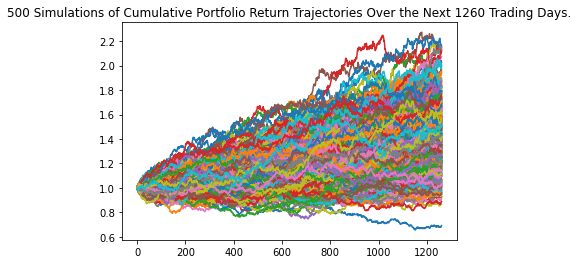

In [249]:
# Plot simulation outcomes
line_plot = MC5.plot_simulation()

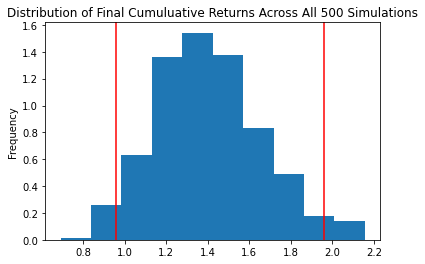

In [251]:
# Plot probability distribution and confidence intervals
dist_plot = MC5.plot_distribution()

In [252]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC5.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              1.404594
std               0.256013
min               0.691311
25%               1.225550
50%               1.377301
75%               1.561997
max               2.156957
95% CI Lower      0.957794
95% CI Upper      1.958991
Name: 1260, dtype: float64

In [254]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8] * 60000, 2)
ci_upper_five = round(tbl[9] * 60000, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57467.63 and $117539.43


### Ten Years Retirement Option

In [257]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC10 = MCSimulation(df_stock_data, weights = [.60, .40], num_simulation = 500, num_trading_days = 252 * 10)
MC10.portfolio_data

AGG                                                    \
                open     high       low   close    volume daily_return   
2018-02-08  106.8400  107.140  106.7700  106.92   4351275          NaN   
2018-02-09  106.7800  107.070  106.7000  106.76   5603974    -0.001496   
2018-02-12  106.7400  106.945  106.6632  106.77   5075086     0.000094   
2018-02-13  106.7900  106.910  106.7000  106.83   3689890     0.000562   
2018-02-14  106.5700  106.660  106.4039  106.46   3695997    -0.003463   
...              ...      ...       ...     ...       ...          ...   
2022-01-21  112.1900  112.350  112.1100  112.24   7789076     0.004025   
2022-01-24  112.3814  112.420  112.1000  112.12  10666672    -0.001069   
2022-01-25  112.1800  112.300  111.9600  112.00   9392367    -0.001070   
2022-01-26  112.0600  112.130  111.3600  111.36  10170465    -0.005714   
2022-01-27  111.6200  111.880  111.6200  111.72   5836124     0.003233   

               SPY                                                  
              open    high     low   close     volume daily_return  
2018-02-08  267.97  268.17  257.59  257.72  156654099          NaN  
2018-02-09  260.80  263.61  252.92  261.67  207357854     0.015327  
2018-02-12  263.87  267.01  261.88  265.26   99933794     0.013720  
2018-02-13  263.94  266.62  263.31  266.01   56891150     0.002827  
2018-02-14  264.47  270.00  263.97  269.71   86705860     0.013909  
...            ...     ...     ...     ...        ...          ...  
2022-01-21  445.56  448.06  437.97  438.11  174541931    -0.019427  
2022-01-24  432.03  440.38  420.76  439.88  233026938     0.004040  
2022-01-25  433.06  439.72  364.68  434.51  148023735    -0.012208  
2022-01-26  440.72  444.04  428.86  433.45  174214548    -0.002440  
2022-01-27  438.26  441.58  429.45  431.27  136251597    -0.005029  

[1000 rows x 12 columns]

In [259]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jacks\Desktop\Fintech\usyd-syd-fin-pt-12-2021-u-c\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002329,0.994950,0.997928,0.996605,0.991501,0.992539,1.005601,1.008845,0.998846,0.995470,...,0.997958,1.008068,0.995235,0.994240,1.002305,1.007885,0.997953,0.983994,0.999137,0.997324
2,1.008791,1.000300,1.000434,0.997690,0.989695,0.988634,1.000588,0.999675,0.993661,0.996833,...,1.006133,1.015773,0.992454,0.997913,0.991882,1.016323,1.007352,0.986358,0.998290,0.992862
3,1.009090,0.998619,1.001202,0.996134,0.990097,0.987995,1.002650,0.993450,0.987147,0.997250,...,1.004039,1.017126,1.000413,0.996178,0.998519,1.020522,1.013614,0.991219,1.008109,0.996342
4,1.014371,1.001541,0.999034,0.995653,0.981425,0.990966,0.998419,0.993015,0.991235,0.993189,...,0.988351,1.019510,1.010171,0.998194,1.006269,1.019908,1.010232,0.993456,1.010663,0.995234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.073974,1.637121,2.036782,1.452321,1.819723,1.406185,2.036020,1.888324,1.726995,0.662360,...,2.069278,2.114948,2.228534,0.907298,3.425584,1.804906,1.481780,2.129822,1.391132,1.487263
2517,2.054182,1.634664,2.022610,1.462311,1.811573,1.398769,2.051718,1.876371,1.714802,0.663711,...,2.083627,2.100159,2.224360,0.905438,3.447642,1.807893,1.497195,2.138004,1.394920,1.481057
2518,2.065951,1.626642,2.047126,1.467846,1.788807,1.393594,2.061313,1.875027,1.702339,0.664304,...,2.086901,2.110631,2.228279,0.908487,3.422538,1.807962,1.482000,2.144518,1.394127,1.494871
2519,2.064894,1.632925,2.069534,1.467054,1.801229,1.387069,2.070579,1.882950,1.693028,0.659175,...,2.104906,2.113416,2.205294,0.904014,3.443152,1.801617,1.481894,2.135092,1.392858,1.502078


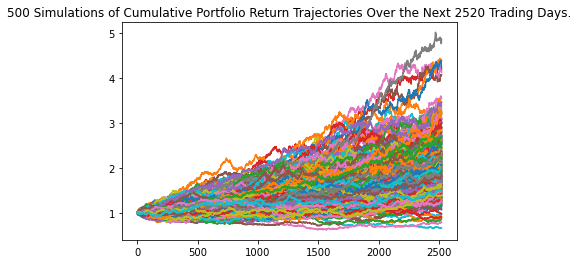

In [260]:
# Plot simulation outcomes
line_plot = MC10.plot_simulation()

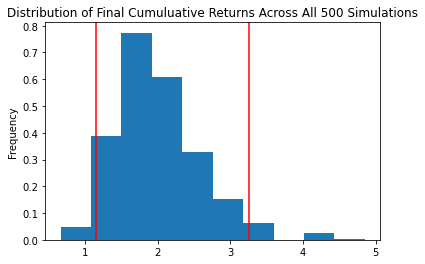

In [261]:
# Plot probability distribution and confidence intervals
dist_plot = MC10.plot_distribution()

In [263]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC10.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              2.002218
std               0.585415
min               0.661910
25%               1.594302
50%               1.913174
75%               2.300229
max               4.848943
95% CI Lower      1.148661
95% CI Upper      3.248810
Name: 2520, dtype: float64

In [265]:
# Set initial investment
Initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8] * 60000, 2)
ci_upper_ten = round(tbl[9] * 60000, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68919.64 and $194928.62
